# Gaussian Mixture Models (GMM) Clustering

This notebook demonstrates GMM clustering using sklearn's GaussianMixture class. GMM is a probabilistic model that represents data as a mixture of multiple Gaussian distributions, providing soft cluster assignments.

**Objective**: Model data as a mixture of Gaussians and explore probabilistic cluster assignments with visualization of probability contours.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from scipy.stats import multivariate_normal

# Setting style
sns.set_style("whitegrid")
np.random.seed(42)

## Data Generation

Generating synthetic data with overlapping clusters to demonstrate GMM's advantage over K-Means in handling soft boundaries and elliptical clusters.

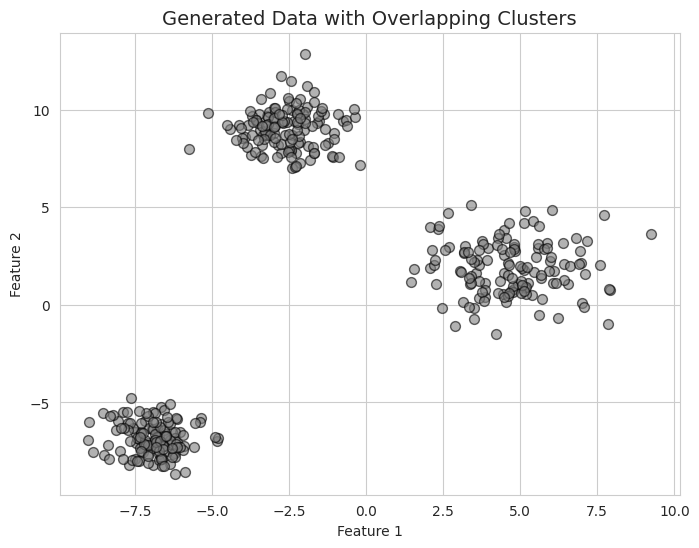

Data shape: (400, 2)
Number of samples: 400


In [2]:
# Generating synthetic data with overlapping clusters
X, true_labels = make_blobs(n_samples=400, centers=3, n_features=2,
                             cluster_std=[1.0, 1.5, 0.8], random_state=42)

# Visualizing the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.6, edgecolors='k', s=50)
plt.title('Generated Data with Overlapping Clusters', fontsize=14)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

print(f"Data shape: {X.shape}")
print(f"Number of samples: {X.shape[0]}")

## Model Selection using BIC and AIC

Testing different numbers of components (clusters) to find the optimal number using BIC and AIC criteria. Lower values indicate better model fit with appropriate complexity.

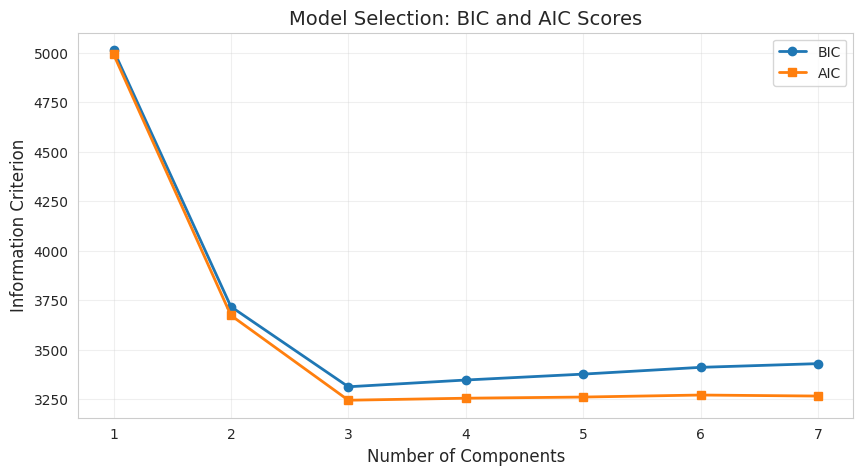

Optimal number of components (based on BIC): 3


In [3]:
# Testing different numbers of components
n_components_range = range(1, 8)
bic_scores = []
aic_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type='full',
                          random_state=42)
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))
    aic_scores.append(gmm.aic(X))

# Plotting BIC and AIC scores
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, bic_scores, marker='o', label='BIC', linewidth=2)
plt.plot(n_components_range, aic_scores, marker='s', label='AIC', linewidth=2)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Information Criterion', fontsize=12)
plt.title('Model Selection: BIC and AIC Scores', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

optimal_components = np.argmin(bic_scores) + 1
print(f"Optimal number of components (based on BIC): {optimal_components}")

## Fitting GMM and Getting Predictions

Fitting Gaussian Mixture Model with the optimal number of components and obtaining both hard labels and probability scores for each point.

In [4]:
# Fitting GMM with optimal number of components
n_components = 3
gmm = GaussianMixture(n_components=n_components, covariance_type='full',
                      random_state=42, n_init=10)
gmm.fit(X)

# Getting predictions
labels = gmm.predict(X)  # Hard assignments
probabilities = gmm.predict_proba(X)  # Soft assignments (probabilities)

# Calculating metrics
silhouette_avg = silhouette_score(X, labels)
log_likelihood = gmm.score(X) * X.shape[0]  # Total log-likelihood

print(f"\n{'='*50}")
print(f"GMM Clustering Results (n_components={n_components})")
print(f"{'='*50}")
print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Log-Likelihood: {log_likelihood:.2f}")
print(f"BIC: {gmm.bic(X):.2f}")
print(f"AIC: {gmm.aic(X):.2f}")
print(f"\nMeans (cluster centers):\n{gmm.means_}")
print(f"\nCluster distribution: {np.bincount(labels)}")


GMM Clustering Results (n_components=3)
Silhouette Score: 0.826
Log-Likelihood: -1605.81
BIC: 3313.47
AIC: 3245.61

Means (cluster centers):
[[-2.5878614   9.04995213]
 [-6.90924761 -6.84413937]
 [ 4.68804053  1.87582721]]

Cluster distribution: [134 133 133]


## Visualizing Clusters and Probability Contours

Plotting the clustering results with probability contours showing the Gaussian distributions. Darker regions indicate higher probability density for each cluster.

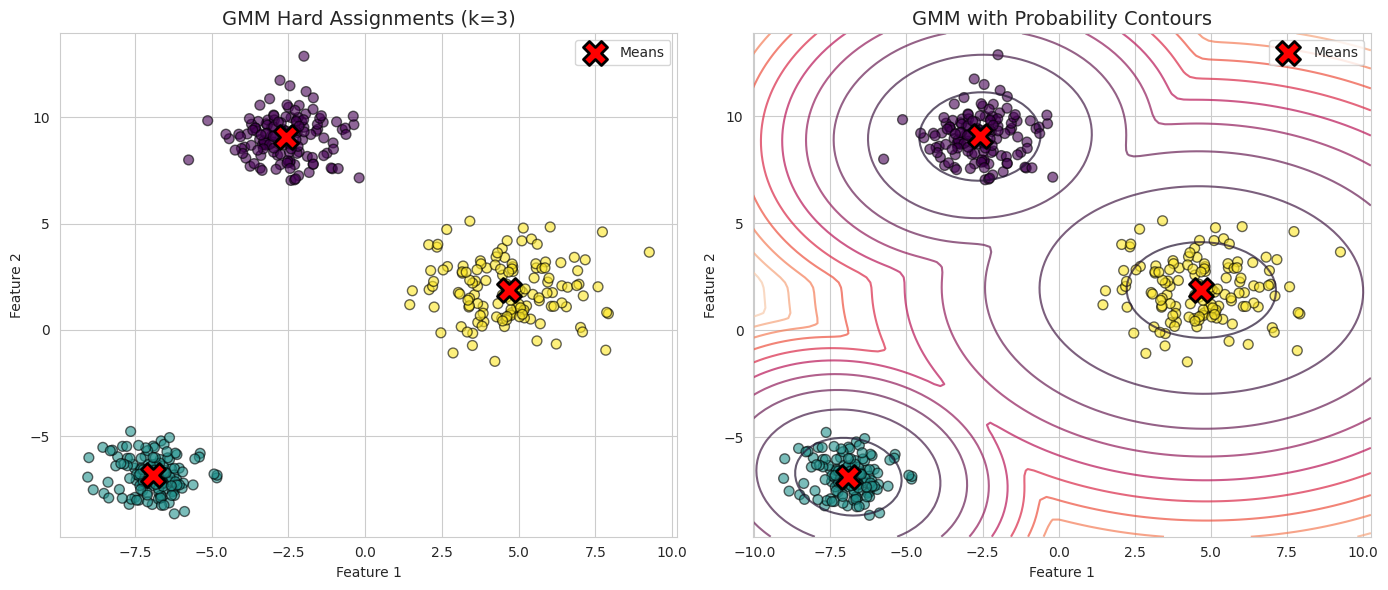

In [5]:
# Creating visualization with probability contours
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Hard cluster assignments
axes[0].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis',
                alpha=0.6, edgecolors='k', s=50)
axes[0].scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='X',
                s=300, edgecolors='black', linewidths=2, label='Means')
axes[0].set_title(f'GMM Hard Assignments (k={n_components})', fontsize=14)
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].legend()

# Subplot 2: Probability contours
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = -gmm.score_samples(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axes[1].contour(xx, yy, Z, levels=10, linewidths=1.5, alpha=0.7)
axes[1].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis',
                alpha=0.6, edgecolors='k', s=50)
axes[1].scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='X',
                s=300, edgecolors='black', linewidths=2, label='Means')
axes[1].set_title('GMM with Probability Contours', fontsize=14)
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].legend()

plt.tight_layout()
plt.show()

## Analyzing Soft Assignments

Examining the probability scores for sample points to understand GMM's soft clustering capability. Each point has a probability distribution across all clusters.

Probability scores for first 10 samples:
   Cluster 0  Cluster 1  Cluster 2  Assigned Cluster
0        0.0        1.0        0.0                 1
1        1.0        0.0        0.0                 0
2        0.0        1.0        0.0                 1
3        0.0        0.0        1.0                 2
4        1.0        0.0        0.0                 0
5        1.0        0.0        0.0                 0
6        1.0        0.0        0.0                 0
7        0.0        1.0        0.0                 1
8        1.0        0.0        0.0                 0
9        0.0        0.0        1.0                 2


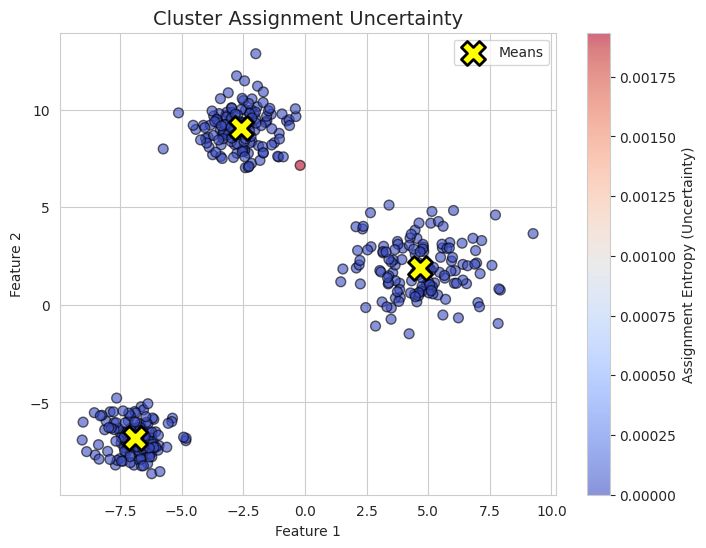


Mean entropy (uncertainty): 0.000
Points with high uncertainty (>90th percentile): 40


In [6]:
# Displaying probability scores for first 10 samples
prob_df = pd.DataFrame(probabilities[:10],
                       columns=[f'Cluster {i}' for i in range(n_components)])
prob_df['Assigned Cluster'] = labels[:10]

print("Probability scores for first 10 samples:")
print(prob_df.round(3))

# Visualizing uncertainty - points with high entropy (uncertain assignments)
entropy = -np.sum(probabilities * np.log(probabilities + 1e-10), axis=1)
uncertain_threshold = np.percentile(entropy, 90)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=entropy, cmap='coolwarm',
                      alpha=0.6, edgecolors='k', s=50)
plt.colorbar(scatter, label='Assignment Entropy (Uncertainty)')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='yellow', marker='X',
            s=300, edgecolors='black', linewidths=2, label='Means')
plt.title('Cluster Assignment Uncertainty', fontsize=14)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print(f"\nMean entropy (uncertainty): {entropy.mean():.3f}")
print(f"Points with high uncertainty (>90th percentile): {np.sum(entropy > uncertain_threshold)}")